In [150]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

import utils

In [151]:
eth_data = utils.load_eth_data()

eth_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [152]:
close_data = eth_data['Close']
close_data.head()

Date
2020-01-01    130.802002
2020-01-02    127.410179
2020-01-03    134.171707
2020-01-04    135.069366
2020-01-05    136.276779
Name: Close, dtype: float64

In [153]:
close_data.shape

(1733,)

In [154]:
test_size = 15
train_size = 100

train_data, test_data = utils.split_train_test(close_data, train_size, test_size)

print(train_data.shape)
print(test_data.shape)

(85,)
(15,)


In [155]:
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

model_fit.summary()

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   85
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -503.442
Date:                Sun, 29 Sep 2024   AIC                           1018.883
Time:                        00:37:50   BIC                           1033.468
Sample:                    06-21-2024   HQIC                          1024.746
                         - 09-13-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0203      0.124      0.164      0.870      -0.222       0.263
ar.L2          0.1903      0.134      1.419      0.156      -0.073       0.453
ar.L3         -0.0705      0.118     -0.596      0.551      -0.302       0.161
ar.L4         -0.0859      0.091     -0.945      0.344      -0.264       0.092
ar.L5          0.1036      0.165      0.628      0.530      -0.220       0.427
sigma2      9372.6346   1432.718      6.542      0.000    6564.560    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.79
Prob(Q):                              0.96   Prob(JB):                         0.06
Heteroskedasticity (H):               0.60   Skew:                             0.20
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
predictions = model_fit.forecast(steps=len(test_data))

predictions[:5]

2024-09-14    2454.577698
2024-09-15    2475.974051
2024-09-16    2466.207912
2024-09-17    2464.585649
2024-09-18    2468.344655
Freq: D, Name: predicted_mean, dtype: float64

In [157]:
mae, mse, rmse = utils.get_metrics(test_data, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 20937.81049473594
MSE: 132.47295100744697
RMSE: 144.6990341872949


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


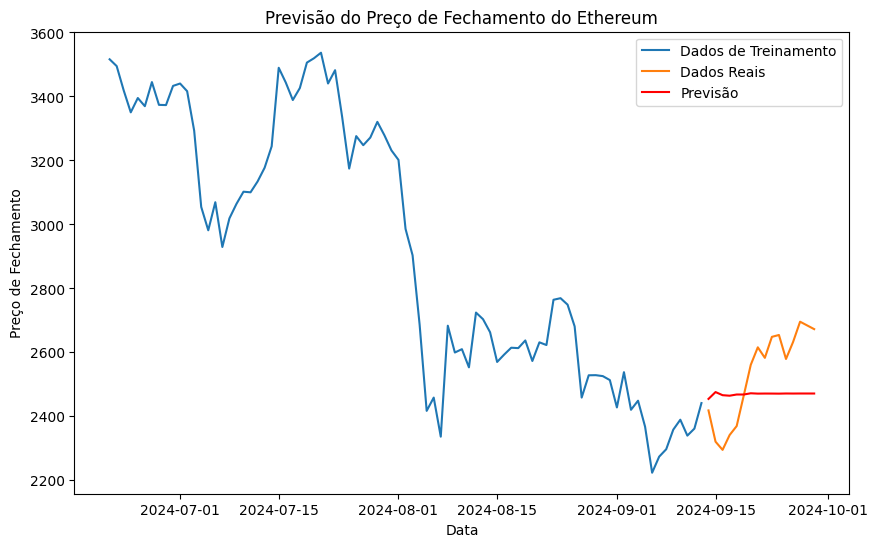

In [158]:
utils.plot_previsions(train_data, test_data, predictions)

# Melhorando o modelo com auto arima

In [159]:
from pmdarima import auto_arima

In [160]:
auto_model = auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -505.549
Date:                Sun, 29 Sep 2024   AIC                           1013.098
Time:                        00:37:51   BIC                           1015.529
Sample:                    06-21-2024   HQIC                          1014.075
                         - 09-13-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9888.4984   1125.347      8.787      0.000    7682.858    1.21e+04
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                12.02
Prob(Q):                              0.91   Pr

In [161]:
auto_model = ARIMA(train_data, order=auto_model.order)
auto_model_fit = model.fit()

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [162]:
predictions_auto = auto_model_fit.forecast(steps=len(test_data))
predictions_auto[:5]

2024-09-14    2454.577698
2024-09-15    2475.974051
2024-09-16    2466.207912
2024-09-17    2464.585649
2024-09-18    2468.344655
Freq: D, Name: predicted_mean, dtype: float64

In [163]:
mse, mae, rmse = utils.get_metrics(test_data, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 20937.81049473594
MAE: 132.47295100744697
RMSE: 144.6990341872949


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


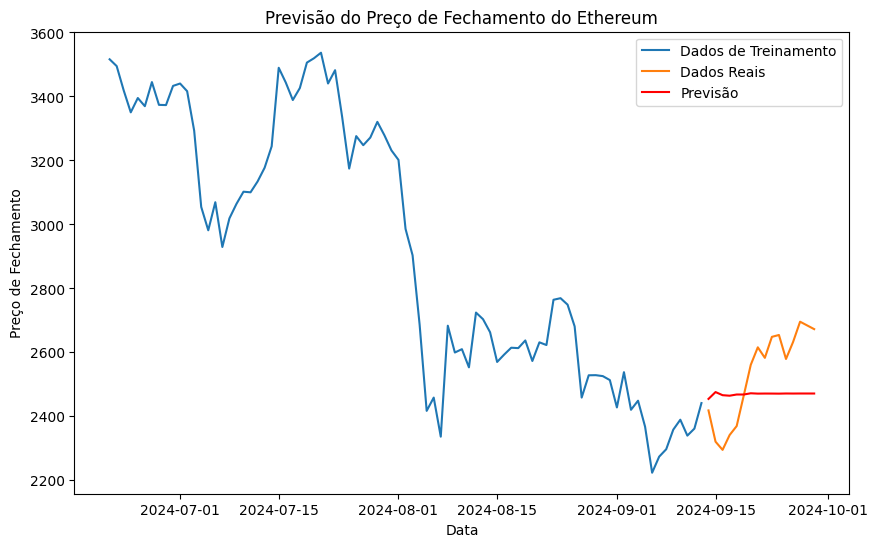

In [164]:
utils.plot_previsions(train_data, test_data, predictions)

O ARIMA não teve resultados tão interessantes, mesmo com o uso do Auto Arima

# Andando pelo tempo, prevendo cada quinzena
Anda por todos os dados, usando os últimos 100 dias pra prever os proximos 15 dias

In [165]:
all_predictions = []
all_test_data = []
mae_list, mse_list, rmse_list = [], [], []

In [166]:
for start in range(0, len(close_data) - train_size - test_size, test_size):
    data = close_data[start:start + train_size + test_size]

    train_data, test_data = utils.split_train_test(data, train_size, test_size)

    # Treinar o modelo ARIMA
    model = ARIMA(train_data, order=(5, 1, 0))
    model_fit = model.fit()

    # Fazer previsões
    predictions = model_fit.forecast(steps=test_size)

    # Armazenar as previsões e os dados reais
    all_predictions.extend(predictions)
    all_test_data.extend(test_data)

    # Adiciona as métricas também pra plotar depois
    mae, mse, rmse = utils.get_metrics(test_data, predictions)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print(f"Janela {start//test_size + 1}: MAE={mae}, MSE={mse}, RMSE={rmse}")


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and 

Janela 1: MAE=277.85900476228215, MSE=13.71829333622922, RMSE=16.66910329808662
Janela 2: MAE=229.14153659687844, MSE=13.939207563415623, RMSE=15.137421728843998
Janela 3: MAE=199.33623850455257, MSE=11.589640869589205, RMSE=14.118648607588213
Janela 4: MAE=1309.7816184527148, MSE=32.357123114228344, RMSE=36.19090518973952
Janela 5: MAE=146.2258124947033, MSE=10.590794108340228, RMSE=12.092386550830373
Janela 6: MAE=210.74681001421703, MSE=13.307052156960133, RMSE=14.517121271595723


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 7: MAE=119.48109544977596, MSE=8.085181894177907, RMSE=10.93074084633681
Janela 8: MAE=6972.702330118542, MSE=74.44040952286028, RMSE=83.50270851965547
Janela 9: MAE=1705.6138187283502, MSE=35.641864796255895, RMSE=41.29907769827736
Janela 10: MAE=1693.8369941543933, MSE=30.057761484266546, RMSE=41.15625097302223
Janela 11: MAE=403.54504367134564, MSE=17.81726683804506, RMSE=20.08843059254121
Janela 12: MAE=145.8332871037671, MSE=11.011438900577408, RMSE=12.076145374405158


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 13: MAE=1258.0789900801055, MSE=33.18762034172037, RMSE=35.46940921526753
Janela 14: MAE=240.20932423671061, MSE=12.009454169655847, RMSE=15.498687823061365
Janela 15: MAE=3006.311397259891, MSE=51.31805710843905, RMSE=54.829840390611125
Janela 16: MAE=6259.582517719976, MSE=72.606341391268, RMSE=79.11752345542658
Janela 17: MAE=1417.9155533598337, MSE=31.194140609630114, RMSE=37.6552194703448
Janela 18: MAE=24143.216586475268, MSE=103.37514274813749, RMSE=155.38087587111636


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 19: MAE=42773.1400324131, MSE=187.8883599875594, RMSE=206.8166821908066
Janela 20: MAE=19786.206844377997, MSE=115.32640216831675, RMSE=140.6634524116979
Janela 21: MAE=20931.976314914937, MSE=129.56496261029912, RMSE=144.6788730772912
Janela 22: MAE=132805.39042422053, MSE=319.8433469351861, RMSE=364.42473903979203
Janela 23: MAE=81182.8682491689, MSE=278.51701173232505, RMSE=284.9260750601266


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 24: MAE=29191.683567697277, MSE=145.43158527539035, RMSE=170.85573905402558
Janela 25: MAE=38624.12648805779, MSE=143.30706112306476, RMSE=196.53021774795292
Janela 26: MAE=381506.25742607325, MSE=512.8445682201537, RMSE=617.6619281015087
Janela 27: MAE=239135.44125724505, MSE=410.7275540032394, RMSE=489.0147658887664
Janela 28: MAE=416240.7908767369, MSE=553.8688428746694, RMSE=645.1672580631606


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 29: MAE=117146.10040723141, MSE=316.5897584202291, RMSE=342.2661251237572
Janela 30: MAE=58414.249161949774, MSE=197.94841500489468, RMSE=241.690399399624
Janela 31: MAE=40247.63842816286, MSE=170.43251504265993, RMSE=200.6181408252077
Janela 32: MAE=175899.50096925243, MSE=362.8822425799798, RMSE=419.4037445818199


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 33: MAE=273200.7701050131, MSE=483.13316754649156, RMSE=522.6861104955948
Janela 34: MAE=85922.56555946423, MSE=235.90655599330373, RMSE=293.1255116148443
Janela 35: MAE=220011.7253541246, MSE=389.8905395254235, RMSE=469.0540750852982
Janela 36: MAE=340419.7580352102, MSE=545.6604703086226, RMSE=583.455018004996
Janela 37: MAE=76769.65145530873, MSE=234.16265043071536, RMSE=277.07336836171885


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 38: MAE=105054.91089192177, MSE=276.43707731115643, RMSE=324.1217531914848
Janela 39: MAE=99595.91227762098, MSE=294.1110568066975, RMSE=315.58820047273787
Janela 40: MAE=112941.08753439938, MSE=305.6089292904347, RMSE=336.0670878476489
Janela 41: MAE=229725.3195018459, MSE=414.5483149895981, RMSE=479.2966925630156
Janela 42: MAE=19568.693160035215, MSE=106.61764544751176, RMSE=139.88814517333202
Janela 43: MAE=180868.09979932962, MSE=346.8336397542549, RMSE=425.28590359819077


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 44: MAE=398797.6750069407, MSE=532.7509917275743, RMSE=631.5042953194703
Janela 45: MAE=161014.6355374215, MSE=351.95689349027754, RMSE=401.2662900586361
Janela 46: MAE=50491.26424770109, MSE=197.51286307432346, RMSE=224.7026129080414
Janela 47: MAE=106180.11301711173, MSE=298.77814364760945, RMSE=325.85290088798


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 48: MAE=245627.4431549971, MSE=452.66055102918784, RMSE=495.60815485118593
Janela 49: MAE=39912.70273531155, MSE=174.66784662786938, RMSE=199.78163763297053
Janela 50: MAE=11620.623518999384, MSE=82.69284299968606, RMSE=107.79899590905002
Janela 51: MAE=238173.48902808412, MSE=369.34048852835224, RMSE=488.0302132328327
Janela 52: MAE=28040.420436139982, MSE=133.81591167514173, RMSE=167.4527409036352
Janela 53: MAE=44989.693078696764, MSE=128.63804225168607, RMSE=212.10773931824545


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 54: MAE=5719.997806044513, MSE=64.35432213633635, RMSE=75.63066710035363
Janela 55: MAE=4347.752488752095, MSE=58.34200563945878, RMSE=65.93748925119985
Janela 56: MAE=163887.07589515642, MSE=379.6604183318936, RMSE=404.82968751705505
Janela 57: MAE=17864.067471604547, MSE=121.19896052450308, RMSE=133.65652797976068


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 58: MAE=100708.43421962777, MSE=275.022521715996, RMSE=317.3459220151218
Janela 59: MAE=33392.95648778907, MSE=162.31164850971356, RMSE=182.7373976168783
Janela 60: MAE=128154.65470922986, MSE=334.14480441853135, RMSE=357.98694767998154
Janela 61: MAE=778.0693864946167, MSE=20.893969827426325, RMSE=27.89389514740845
Janela 62: MAE=8591.672054863808, MSE=53.83730742965843, RMSE=92.69127280852177


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 63: MAE=30017.768599260682, MSE=105.54249505832782, RMSE=173.25636669184968
Janela 64: MAE=26689.488417208275, MSE=152.27079065898002, RMSE=163.36917829630005
Janela 65: MAE=3894.8877293589226, MSE=54.835980392598124, RMSE=62.40903563875124
Janela 66: MAE=3967.8992846009473, MSE=55.100287422773775, RMSE=62.99126355774225
Janela 67: MAE=1654.4837702758682, MSE=30.92947367259297, RMSE=40.67534597610533


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 68: MAE=59253.567034034946, MSE=224.4138679080331, RMSE=243.42055589870577
Janela 69: MAE=4557.133422142918, MSE=59.62603525354079, RMSE=67.50654355055455
Janela 70: MAE=6671.246222837784, MSE=63.16100262870371, RMSE=81.6776972180153
Janela 71: MAE=9646.389940719899, MSE=74.6313781256124, RMSE=98.21603708519245
Janela 72: MAE=98200.5107500309, MSE=300.848968223435, RMSE=313.3696072532097


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 73: MAE=8999.506248893558, MSE=85.4992953294008, RMSE=94.86572747253646
Janela 74: MAE=21802.431842673876, MSE=112.276537829349, RMSE=147.65646563111918
Janela 75: MAE=3185.0364280219487, MSE=44.12914214370036, RMSE=56.43612697574089
Janela 76: MAE=2351.168063517994, MSE=45.42934207695319, RMSE=48.488844732762956
Janela 77: MAE=5178.237437034605, MSE=63.46351938999484, RMSE=71.95997107444252


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 78: MAE=10881.65262249226, MSE=92.21284167877371, RMSE=104.31516007988608
Janela 79: MAE=1399.6202978990007, MSE=32.86353582560534, RMSE=37.41149954090321
Janela 80: MAE=2679.7816044996653, MSE=37.81238654360821, RMSE=51.766607040636394
Janela 81: MAE=1290.1518527181568, MSE=31.035992442528308, RMSE=35.91868389457159
Janela 82: MAE=10531.609720998726, MSE=75.49330140023021, RMSE=102.62363139647088


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 83: MAE=1269.4180678776652, MSE=22.95024480958218, RMSE=35.62889372233813
Janela 84: MAE=790.7964828866262, MSE=18.84860726311714, RMSE=28.12110387034311
Janela 85: MAE=3216.604699813813, MSE=41.71149208864687, RMSE=56.715118793967214
Janela 86: MAE=4884.6716537431985, MSE=62.962680746719315, RMSE=69.89042605209384
Janela 87: MAE=34047.24743205344, MSE=177.69186870180457, RMSE=184.51896225606038
Janela 88: MAE=13595.68029300031, MSE=98.65959384441152, RMSE=116.60051583505242


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 89: MAE=12569.209960631228, MSE=80.60680768434074, RMSE=112.11248797806259
Janela 90: MAE=6885.076538166441, MSE=74.98341756878156, RMSE=82.9763613215622
Janela 91: MAE=12007.350424721075, MSE=98.53466480677017, RMSE=109.57805631019869
Janela 92: MAE=52278.48887588344, MSE=197.4970870562956, RMSE=228.64489689447137
Janela 93: MAE=39651.31470248815, MSE=186.3533833094863, RMSE=199.126378720872
Janela 94: MAE=114975.63887946299, MSE=279.82410394391286, RMSE=339.0805787411939


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 95: MAE=132196.73340188203, MSE=289.75836521915056, RMSE=363.58868712032563
Janela 96: MAE=61373.5635254672, MSE=211.05893011369847, RMSE=247.7368836597958
Janela 97: MAE=638031.4889950175, MSE=765.1496498435891, RMSE=798.7687331105402
Janela 98: MAE=55939.924793395796, MSE=174.3571524368111, RMSE=236.516225222279


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

Janela 99: MAE=17542.431664080377, MSE=115.37351303735535, RMSE=132.44784507148609
Janela 100: MAE=14848.66595851988, MSE=102.71701445866053, RMSE=121.8551023081097
Janela 101: MAE=391461.084792834, MSE=605.4533315725744, RMSE=625.6685103094402
Janela 102: MAE=35298.59488922272, MSE=156.61997928371696, RMSE=187.87920291831855
Janela 103: MAE=9982.47644285047, MSE=84.38991093192308, RMSE=99.91234379620202
Janela 104: MAE=88437.07988044732, MSE=261.46555665422653, RMSE=297.38372497574125
Janela 105: MAE=17827.19962215631, MSE=120.59558205287858, RMSE=133.51853662378235
Janela 106: MAE=333991.32586772816, MSE=555.2714111219908, RMSE=577.9198265051374
Janela 107: MAE=9651.029742686984, MSE=81.0288151905965, RMSE=98.23965463440405
Janela 108: MAE=23375.52530537726, MSE=136.582155896666, RMSE=152.89056643683827


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:47

In [167]:
mae, mse, rmse = utils.get_metrics(all_test_data, all_predictions)
print(f"Métricas gerais - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


Métricas gerais - MAE: 72360.90015318093, MSE: 175.82343973670044, RMSE: 268.99981441105297


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [168]:
print(len(all_test_data), len(all_predictions), len(mae_list))

1620 1620 108


In [169]:
interpolated_mse = np.repeat(mse_list, len(all_test_data) // len(mse_list))

In [170]:
test_data_indices = close_data.index[-len(all_test_data):]

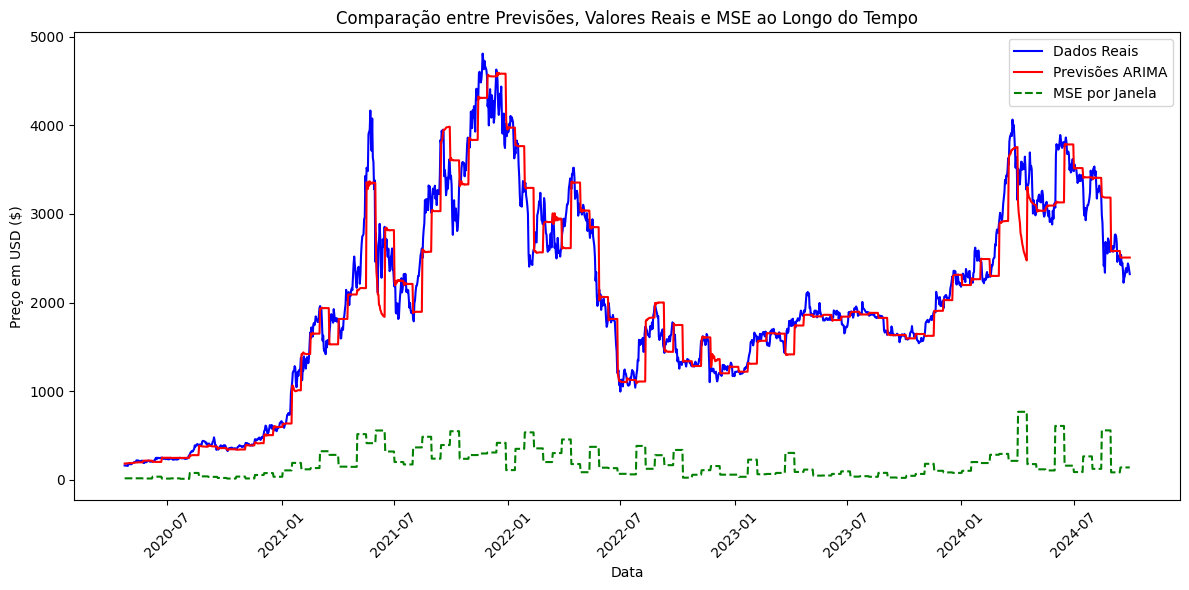

In [171]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_indices, all_test_data, label='Dados Reais', color='blue')
plt.plot(test_data_indices, all_predictions, label='Previsões ARIMA', color='red')
plt.plot(test_data_indices, interpolated_mse, label='MSE por Janela', color='green', linestyle='--')
plt.title('Comparação entre Previsões, Valores Reais e MSE ao Longo do Tempo')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Preço em USD ($)')
plt.legend()

plt.tight_layout()
plt.show()
